In [1]:
import os
import sys
import numpy as np
import pandas as pd
import seuif97
from matplotlib import pyplot as plt

data_path = "e:/dev/data-analysis/eturb_model/data"
regression_data_path = "e:/dev/data-analysis/eturb_model/result/regression"
result_data_path = "e:/dev/data-analysis/eturb_model/result"

In [2]:
def get_origin_data():
    """
    origin data
    """
    # raw data
    eturb_m1_data = pd.read_csv(os.path.join(data_path, "eturb_m1_1min_metrics-0817.csv"), header = 0, index_col = None)
    eturb_m2_data = pd.read_csv(os.path.join(data_path, "eturb_m2_1min_metrics-0817.csv"), header = 0, index_col = None)
    
    data = pd.DataFrame()
    # eturb_m1
    data["eturb_m1_steam_flow_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_flow_in"]
    data["eturb_m1_steam_pressure_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_pressure_in"]
    data["eturb_m1_steam_temperature_in"] = eturb_m1_data["ExtCondensTurbineOP.steam_temperature_in"]
    data["eturb_m1_steam_flow_side"] = eturb_m1_data["ExtCondensTurbineOP.steam_flow_side"]
    data["eturb_m1_steam_pressure_side"] = eturb_m1_data["ExtCondensTurbineOP.steam_pressure_side"]
    data["eturb_m1_steam_temperature_side"] = eturb_m1_data["ExtCondensTurbineOP.steam_temperature_side"]
    data["eturb_m1_steam_pressure_out"] = eturb_m1_data["ExtCondensTurbineOP.steam_pressure_out"]
    data["eturb_m1_steam_temperature_out"] = eturb_m1_data["ExtCondensTurbineOP.steam_temperature_out"]
    data["eturb_m1_electricity_generation"] = eturb_m1_data["ExtCondensTurbineOP.electricity_generation"]
    # eturb_m2
    data["eturb_m2_steam_flow_in"] = eturb_m2_data["ExtCondensTurbineOP.steam_flow_in"]
    data["eturb_m2_steam_pressure_in"] = eturb_m2_data["ExtCondensTurbineOP.steam_pressure_in"]
    data["eturb_m2_steam_temperature_in"] = eturb_m2_data["ExtCondensTurbineOP.steam_temperature_in"]
    data["eturb_m2_steam_flow_side"] = eturb_m2_data["ExtCondensTurbineOP.steam_flow_side"]
    data["eturb_m2_steam_pressure_side"] = eturb_m2_data["ExtCondensTurbineOP.steam_pressure_side"]
    data["eturb_m2_steam_temperature_side"] = eturb_m2_data["ExtCondensTurbineOP.steam_temperature_side"]
    data["eturb_m2_steam_pressure_out"] = eturb_m2_data["ExtCondensTurbineOP.steam_pressure_out"]
    data["eturb_m2_steam_temperature_out"] = eturb_m2_data["ExtCondensTurbineOP.steam_temperature_out"]
    data["eturb_m2_electricity_generation"] = eturb_m2_data["ExtCondensTurbineOP.electricity_generation"]
    data = data.reset_index(drop = True)
    
    return data


def get_result_data():
    result_data = pd.DataFrame()
    file_names = [
        "eturb_m1_result_base",
        "eturb_m1_result_delta",
        "eturb_m1_result_origin",
        "eturb_m2_result_base",
        "eturb_m2_result_delta",
        "eturb_m2_result_origin"
    ]
    for name in file_names:
        temp_data = pd.read_csv(os.path.join(regression_data_path, "%s.csv" % name), header = 0, index_col = None)
        result_data = pd.concat([result_data, temp_data], axis = 1, sort = False)

    return result_data


def data_preprocessing(data, method, is_export_csv = 0):
    """
    data preprocessing
    """
    df = pd.DataFrame()
    if method == "origin":
        df = data
    elif method == "base":
        df = data
    elif method == "delta":
        df["eturb_m1_steam_flow_in"] = np.array(data["eturb_m1_steam_flow_in"].iloc[1:1441]) - np.array(data["eturb_m1_steam_flow_in"].iloc[0:1440])
        df["eturb_m1_steam_flow_side"] = np.array(data["eturb_m1_steam_flow_side"].iloc[1:1441]) - np.array(data["eturb_m1_steam_flow_side"].iloc[0:1440])
        df["eturb_m1_electricity_generation"] = np.array(data["eturb_m1_electricity_generation"].iloc[1:1441]) - np.array(data["eturb_m1_electricity_generation"].iloc[0:1440])
        df["eturb_m2_steam_flow_in"] = np.array(data["eturb_m2_steam_flow_in"].iloc[1:1441]) - np.array(data["eturb_m2_steam_flow_in"].iloc[0:1440])
        df["eturb_m2_steam_flow_side"] = np.array(data["eturb_m2_steam_flow_side"].iloc[1:1441]) - np.array(data["eturb_m2_steam_flow_side"].iloc[0:1440])
        df["eturb_m2_electricity_generation"] = np.array(data["eturb_m2_electricity_generation"].iloc[1:1441]) - np.array(data["eturb_m2_electricity_generation"].iloc[0:1440])
        if is_export_csv:
            df.to_csv(os.path.join(result_data_path, "raw_data.csv"), index = None)
    elif method == "mean":
        for i, j in zip(range(0, 1450, 10), range(60, 1450, 10)):
            temp_df = pd.DataFrame(data.iloc[i:j].mean(axis = 0))
            df = pd.concat([df, temp_df.transpose()], axis = 0, sort = False)
    
    return df


def scatter_plot(df, xlabel, *ylabels, imgpath = None):
    fig, axs = plt.subplots(figsize = (10, 7), tight_layout = True)
    for ylabel in ylabels:
        plt.scatter(df[xlabel], df[ylabel], label = ylabel)
        plt.title("%s VS %s" % (xlabel, ylabel))
        plt.xlabel("%s" % xlabel)
        plt.ylabel("%s" % ylabel)
        plt.legend()
        if imgpath:
            plt.savefig(imgpath)
        plt.show()

## 1.Data

In [6]:
result_df = get_result_data()
result_df_origin = result_df[["eturb_m1_origin_k1", "eturb_m1_origin_k2"]].reset_index(drop = True)
result_df_delta = result_df[["eturb_m1_delta_k1", "eturb_m1_delta_k2"]].reset_index(drop = True)
result_df_base = result_df[["eturb_m1_base_k1", "eturb_m1_base_k2"]].reset_index(drop = True)
origin_data = get_origin_data()
origin_df = data_preprocessing(origin_data, method = "mean", is_export_csv = 0)
origin_df = origin_df[["eturb_m1_steam_pressure_in", "eturb_m1_steam_pressure_side"]].reset_index(drop = True)

# Origin k1、k2
df_origin = pd.concat([result_df_origin, origin_df], axis = 1, sort = False)
print(df_origin.head())
print(df_origin.shape)

# Delta k1、k2
df_delta = pd.concat([result_df_delta, origin_df], axis = 1, sort = False)
print(df_delta.head())
print(df_delta.shape)

# Base k1、 k2
df_base = pd.concat([result_df_base, origin_df], axis = 1, sort = False)
print(df_base.head())
print(df_base.shape)

   eturb_m1_origin_k1  eturb_m1_origin_k2  eturb_m1_steam_pressure_in  \
0            0.134648           -0.116259                    3.084458   
1            0.165471           -0.156152                    3.089333   
2            0.168795           -0.136400                    3.088972   
3            0.151719           -0.129194                    3.103014   
4            0.165731           -0.140995                    3.116069   

   eturb_m1_steam_pressure_side  
0                      0.803222  
1                      0.799292  
2                      0.799528  
3                      0.800486  
4                      0.801792  
(139, 4)
   eturb_m1_delta_k1  eturb_m1_delta_k2  eturb_m1_steam_pressure_in  \
0           0.108579          -0.031075                    3.084458   
1           0.122128          -0.043690                    3.089333   
2           0.123993          -0.043518                    3.088972   
3           0.121857          -0.056079                    3.103

## 2.Scatter of k and pressure

### 2.1 汽机进汽压力与回归系数 k1 的散点图

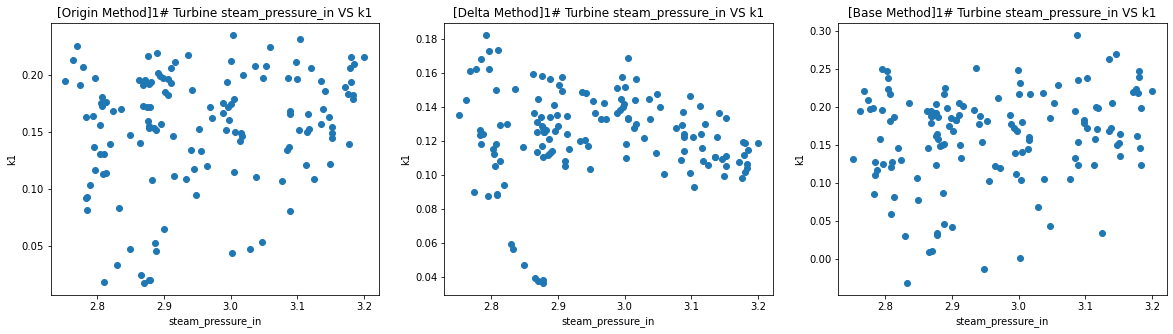

In [24]:
fig, axs = plt.subplots(figsize = (20, 5))
plt.subplot(1, 3, 1)
plt.scatter(df_origin["eturb_m1_steam_pressure_in"], df_origin["eturb_m1_origin_k1"])
plt.title("[Origin Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 3, 2)
plt.scatter(df_delta["eturb_m1_steam_pressure_in"], df_delta["eturb_m1_delta_k1"])
plt.title("[Delta Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 3, 3)
plt.scatter(df_base["eturb_m1_steam_pressure_in"], df_base["eturb_m1_base_k1"])
plt.title("[Base Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.show()

### 2.2 汽机抽汽压力与回归系数 k2 的散点图

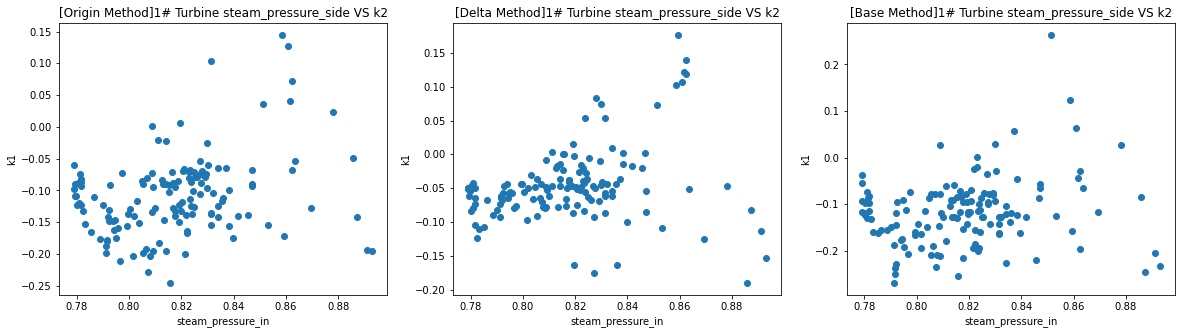

In [25]:
fig, axs = plt.subplots(figsize = (20, 5))
plt.subplot(1, 3, 1)
plt.scatter(df_origin["eturb_m1_steam_pressure_side"], df_origin["eturb_m1_origin_k2"])
plt.title("[Origin Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k1")
plt.subplot(1, 3, 2)
plt.scatter(df_delta["eturb_m1_steam_pressure_side"], df_delta["eturb_m1_delta_k2"])
plt.title("[Delta Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k1")
plt.subplot(1, 3, 3)
plt.scatter(df_base["eturb_m1_steam_pressure_side"], df_base["eturb_m1_base_k2"])
plt.title("[Base Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k1")
plt.show()

### 2.3 Origin 进气压力 VS k1 分组

In [35]:
df = df_origin

# steam_pressure_in group 
group_threshold_2 = 2.7
group_threshold_3 = 2.8
group_threshold_4 = 2.9
group_threshold_5 = 3.0
group_threshold_6 = 3.1
group_threshold_7 = 3.2
temp_df_in_2 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_2) & (df["eturb_m1_steam_pressure_in"] < group_threshold_3))]
temp_df_in_3 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_3) & (df["eturb_m1_steam_pressure_in"] < group_threshold_4))]
temp_df_in_4 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_4) & (df["eturb_m1_steam_pressure_in"] < group_threshold_5))]
temp_df_in_5 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_5) & (df["eturb_m1_steam_pressure_in"] < group_threshold_6))]
temp_df_in_6 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_6) & (df["eturb_m1_steam_pressure_in"] <= group_threshold_7))]

# steam_pressure_side group
group_threshold_1 = 0
group_threshold_2 = 0.78
group_threshold_3 = 0.80
group_threshold_4 = 0.82
group_threshold_5 = 0.83
group_threshold_6 = 0.84
group_threshold_7 = 0.86
group_threshold_8 = 0.88
group_threshold_9 = 1.0
temp_df_side_1 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_1) & (df["eturb_m1_steam_pressure_side"] < group_threshold_2))]
temp_df_side_2 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_2) & (df["eturb_m1_steam_pressure_side"] < group_threshold_3))]
temp_df_side_3 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_3) & (df["eturb_m1_steam_pressure_side"] < group_threshold_4))]
temp_df_side_4 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_4) & (df["eturb_m1_steam_pressure_side"] < group_threshold_5))]
temp_df_side_5 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_5) & (df["eturb_m1_steam_pressure_side"] < group_threshold_6))]
temp_df_side_6 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_6) & (df["eturb_m1_steam_pressure_side"] < group_threshold_7))]
temp_df_side_7 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_7) & (df["eturb_m1_steam_pressure_side"] < group_threshold_8))]
temp_df_side_8 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_8) & (df["eturb_m1_steam_pressure_side"] <= group_threshold_9))]

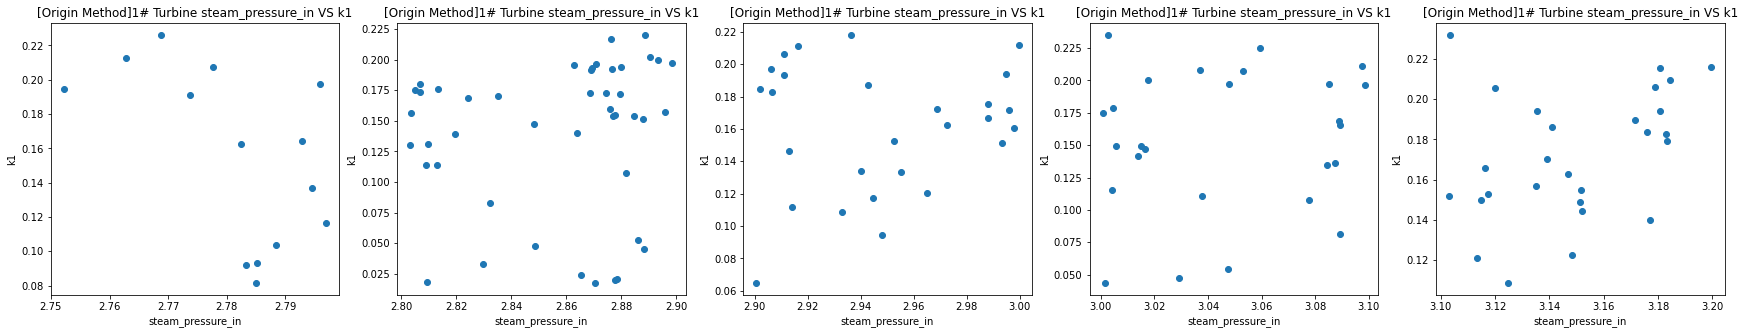

In [36]:
fig, axs = plt.subplots(figsize = (30, 5))
plt.subplot(1, 5, 1)
plt.scatter(temp_df_in_2["eturb_m1_steam_pressure_in"], temp_df_in_2["eturb_m1_origin_k1"])
plt.title("[Origin Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 5, 2)
plt.scatter(temp_df_in_3["eturb_m1_steam_pressure_in"], temp_df_in_3["eturb_m1_origin_k1"])
plt.title("[Origin Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 5, 3)
plt.scatter(temp_df_in_4["eturb_m1_steam_pressure_in"], temp_df_in_4["eturb_m1_origin_k1"])
plt.title("[Origin Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 5, 4)
plt.scatter(temp_df_in_5["eturb_m1_steam_pressure_in"], temp_df_in_5["eturb_m1_origin_k1"])
plt.title("[Origin Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 5, 5)
plt.scatter(temp_df_in_6["eturb_m1_steam_pressure_in"], temp_df_in_6["eturb_m1_origin_k1"])
plt.title("[Origin Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.show()

### 2.4 Origin 抽汽压力 VS k2 分组

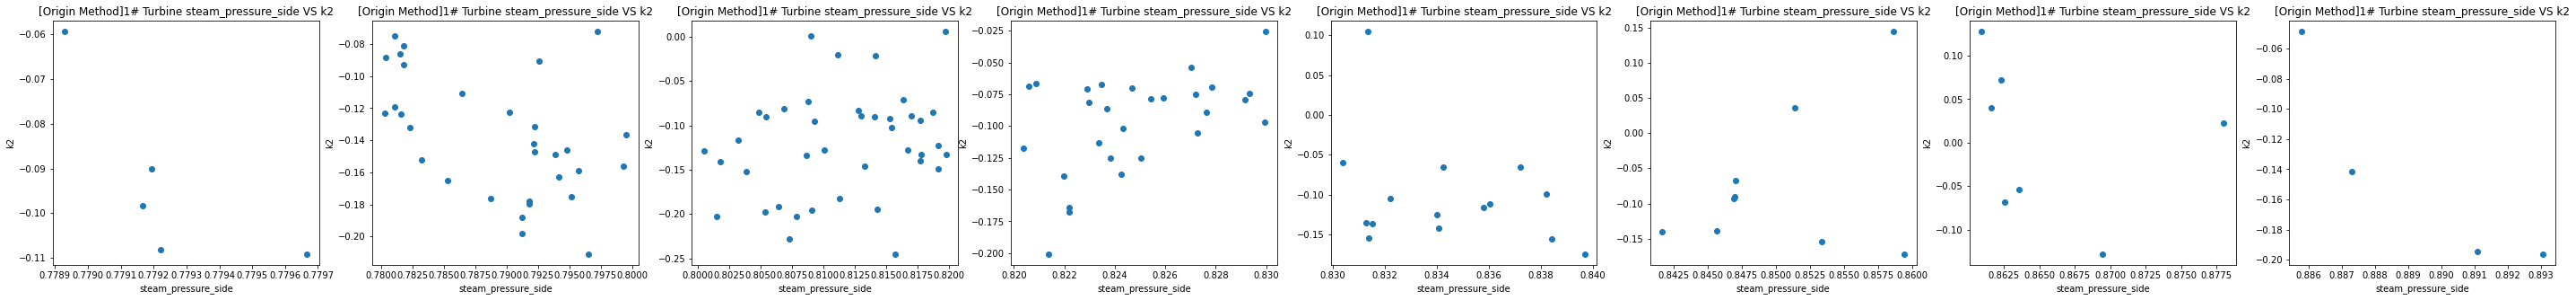

In [37]:
fig, axs = plt.subplots(figsize = (50, 5))
plt.subplot(1, 8, 1)
plt.scatter(temp_df_side_1["eturb_m1_steam_pressure_side"], temp_df_side_1["eturb_m1_origin_k2"])
plt.title("[Origin Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 2)
plt.scatter(temp_df_side_2["eturb_m1_steam_pressure_side"], temp_df_side_2["eturb_m1_origin_k2"])
plt.title("[Origin Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 3)
plt.scatter(temp_df_side_3["eturb_m1_steam_pressure_side"], temp_df_side_3["eturb_m1_origin_k2"])
plt.title("[Origin Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 4)
plt.scatter(temp_df_side_4["eturb_m1_steam_pressure_side"], temp_df_side_4["eturb_m1_origin_k2"])
plt.title("[Origin Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 5)
plt.scatter(temp_df_side_5["eturb_m1_steam_pressure_side"], temp_df_side_5["eturb_m1_origin_k2"])
plt.title("[Origin Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 6)
plt.scatter(temp_df_side_6["eturb_m1_steam_pressure_side"], temp_df_side_6["eturb_m1_origin_k2"])
plt.title("[Origin Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 7)
plt.scatter(temp_df_side_7["eturb_m1_steam_pressure_side"], temp_df_side_7["eturb_m1_origin_k2"])
plt.title("[Origin Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 8)
plt.scatter(temp_df_side_8["eturb_m1_steam_pressure_side"], temp_df_side_8["eturb_m1_origin_k2"])
plt.title("[Origin Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.show()

### 2.5 Delta 进气压力 VS k1 分组

In [38]:
df = df_delta

# steam_pressure_in group 
group_threshold_2 = 2.7
group_threshold_3 = 2.8
group_threshold_4 = 2.9
group_threshold_5 = 3.0
group_threshold_6 = 3.1
group_threshold_7 = 3.2
temp_df_in_2 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_2) & (df["eturb_m1_steam_pressure_in"] < group_threshold_3))]
temp_df_in_3 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_3) & (df["eturb_m1_steam_pressure_in"] < group_threshold_4))]
temp_df_in_4 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_4) & (df["eturb_m1_steam_pressure_in"] < group_threshold_5))]
temp_df_in_5 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_5) & (df["eturb_m1_steam_pressure_in"] < group_threshold_6))]
temp_df_in_6 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_6) & (df["eturb_m1_steam_pressure_in"] <= group_threshold_7))]

# steam_pressure_side group
group_threshold_1 = 0
group_threshold_2 = 0.78
group_threshold_3 = 0.80
group_threshold_4 = 0.82
group_threshold_5 = 0.83
group_threshold_6 = 0.84
group_threshold_7 = 0.86
group_threshold_8 = 0.88
group_threshold_9 = 1.0
temp_df_side_1 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_1) & (df["eturb_m1_steam_pressure_side"] < group_threshold_2))]
temp_df_side_2 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_2) & (df["eturb_m1_steam_pressure_side"] < group_threshold_3))]
temp_df_side_3 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_3) & (df["eturb_m1_steam_pressure_side"] < group_threshold_4))]
temp_df_side_4 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_4) & (df["eturb_m1_steam_pressure_side"] < group_threshold_5))]
temp_df_side_5 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_5) & (df["eturb_m1_steam_pressure_side"] < group_threshold_6))]
temp_df_side_6 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_6) & (df["eturb_m1_steam_pressure_side"] < group_threshold_7))]
temp_df_side_7 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_7) & (df["eturb_m1_steam_pressure_side"] < group_threshold_8))]
temp_df_side_8 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_8) & (df["eturb_m1_steam_pressure_side"] <= group_threshold_9))]

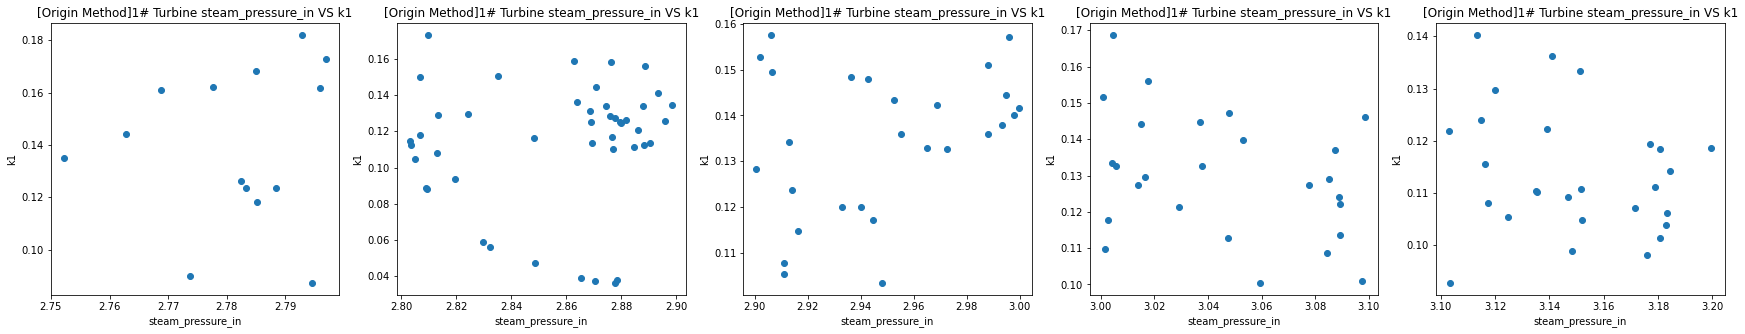

In [40]:
fig, axs = plt.subplots(figsize = (30, 5))
plt.subplot(1, 5, 1)
plt.scatter(temp_df_in_2["eturb_m1_steam_pressure_in"], temp_df_in_2["eturb_m1_delta_k1"])
plt.title("[Delta Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 5, 2)
plt.scatter(temp_df_in_3["eturb_m1_steam_pressure_in"], temp_df_in_3["eturb_m1_delta_k1"])
plt.title("[Delta Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 5, 3)
plt.scatter(temp_df_in_4["eturb_m1_steam_pressure_in"], temp_df_in_4["eturb_m1_delta_k1"])
plt.title("[Delta Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 5, 4)
plt.scatter(temp_df_in_5["eturb_m1_steam_pressure_in"], temp_df_in_5["eturb_m1_delta_k1"])
plt.title("[Delta Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 5, 5)
plt.scatter(temp_df_in_6["eturb_m1_steam_pressure_in"], temp_df_in_6["eturb_m1_delta_k1"])
plt.title("[Delta Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.show()

### 2.6 Delta 抽汽压力 VS k2 分组

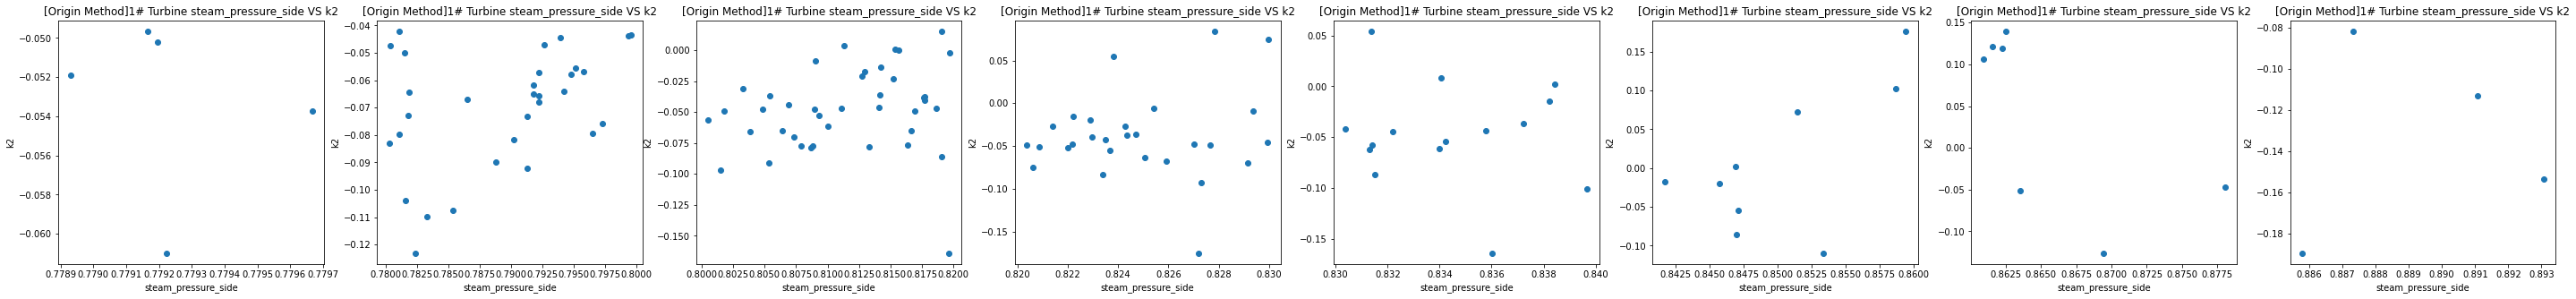

In [41]:
fig, axs = plt.subplots(figsize = (50, 5))
plt.subplot(1, 8, 1)
plt.scatter(temp_df_side_1["eturb_m1_steam_pressure_side"], temp_df_side_1["eturb_m1_delta_k2"])
plt.title("[Delta Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 2)
plt.scatter(temp_df_side_2["eturb_m1_steam_pressure_side"], temp_df_side_2["eturb_m1_delta_k2"])
plt.title("[Delta Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 3)
plt.scatter(temp_df_side_3["eturb_m1_steam_pressure_side"], temp_df_side_3["eturb_m1_delta_k2"])
plt.title("[Delta Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 4)
plt.scatter(temp_df_side_4["eturb_m1_steam_pressure_side"], temp_df_side_4["eturb_m1_delta_k2"])
plt.title("[Delta Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 5)
plt.scatter(temp_df_side_5["eturb_m1_steam_pressure_side"], temp_df_side_5["eturb_m1_delta_k2"])
plt.title("[Delta Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 6)
plt.scatter(temp_df_side_6["eturb_m1_steam_pressure_side"], temp_df_side_6["eturb_m1_delta_k2"])
plt.title("[Delta Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 7)
plt.scatter(temp_df_side_7["eturb_m1_steam_pressure_side"], temp_df_side_7["eturb_m1_delta_k2"])
plt.title("[Delta Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 8)
plt.scatter(temp_df_side_8["eturb_m1_steam_pressure_side"], temp_df_side_8["eturb_m1_delta_k2"])
plt.title("[Delta Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.show()

### 2.7 Base 进气压力 VS k1 分组

In [42]:
df = df_base

# steam_pressure_in group 
group_threshold_2 = 2.7
group_threshold_3 = 2.8
group_threshold_4 = 2.9
group_threshold_5 = 3.0
group_threshold_6 = 3.1
group_threshold_7 = 3.2
temp_df_in_2 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_2) & (df["eturb_m1_steam_pressure_in"] < group_threshold_3))]
temp_df_in_3 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_3) & (df["eturb_m1_steam_pressure_in"] < group_threshold_4))]
temp_df_in_4 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_4) & (df["eturb_m1_steam_pressure_in"] < group_threshold_5))]
temp_df_in_5 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_5) & (df["eturb_m1_steam_pressure_in"] < group_threshold_6))]
temp_df_in_6 = df.loc[((df["eturb_m1_steam_pressure_in"] >= group_threshold_6) & (df["eturb_m1_steam_pressure_in"] <= group_threshold_7))]

# steam_pressure_side group
group_threshold_1 = 0
group_threshold_2 = 0.78
group_threshold_3 = 0.80
group_threshold_4 = 0.82
group_threshold_5 = 0.83
group_threshold_6 = 0.84
group_threshold_7 = 0.86
group_threshold_8 = 0.88
group_threshold_9 = 1.0
temp_df_side_1 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_1) & (df["eturb_m1_steam_pressure_side"] < group_threshold_2))]
temp_df_side_2 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_2) & (df["eturb_m1_steam_pressure_side"] < group_threshold_3))]
temp_df_side_3 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_3) & (df["eturb_m1_steam_pressure_side"] < group_threshold_4))]
temp_df_side_4 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_4) & (df["eturb_m1_steam_pressure_side"] < group_threshold_5))]
temp_df_side_5 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_5) & (df["eturb_m1_steam_pressure_side"] < group_threshold_6))]
temp_df_side_6 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_6) & (df["eturb_m1_steam_pressure_side"] < group_threshold_7))]
temp_df_side_7 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_7) & (df["eturb_m1_steam_pressure_side"] < group_threshold_8))]
temp_df_side_8 = df.loc[((df["eturb_m1_steam_pressure_side"] >= group_threshold_8) & (df["eturb_m1_steam_pressure_side"] <= group_threshold_9))]

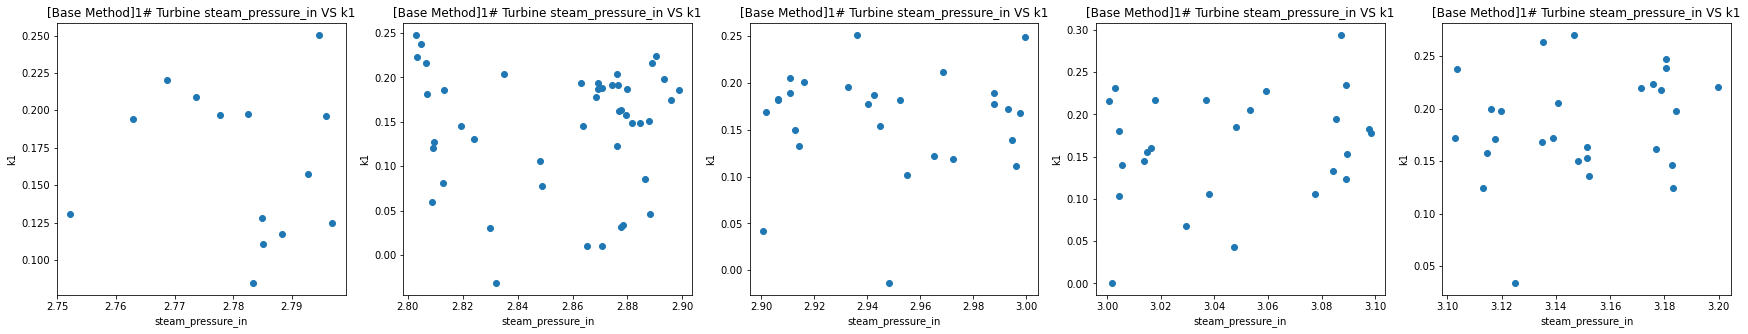

In [43]:
fig, axs = plt.subplots(figsize = (30, 5))
plt.subplot(1, 5, 1)
plt.scatter(temp_df_in_2["eturb_m1_steam_pressure_in"], temp_df_in_2["eturb_m1_base_k1"])
plt.title("[Base Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 5, 2)
plt.scatter(temp_df_in_3["eturb_m1_steam_pressure_in"], temp_df_in_3["eturb_m1_base_k1"])
plt.title("[Base Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 5, 3)
plt.scatter(temp_df_in_4["eturb_m1_steam_pressure_in"], temp_df_in_4["eturb_m1_base_k1"])
plt.title("[Base Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 5, 4)
plt.scatter(temp_df_in_5["eturb_m1_steam_pressure_in"], temp_df_in_5["eturb_m1_base_k1"])
plt.title("[Base Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.subplot(1, 5, 5)
plt.scatter(temp_df_in_6["eturb_m1_steam_pressure_in"], temp_df_in_6["eturb_m1_base_k1"])
plt.title("[Base Method]1# Turbine steam_pressure_in VS k1")
plt.xlabel("steam_pressure_in")
plt.ylabel("k1")
plt.show()

### 2.8 Base 抽汽压力 VS k2 分组

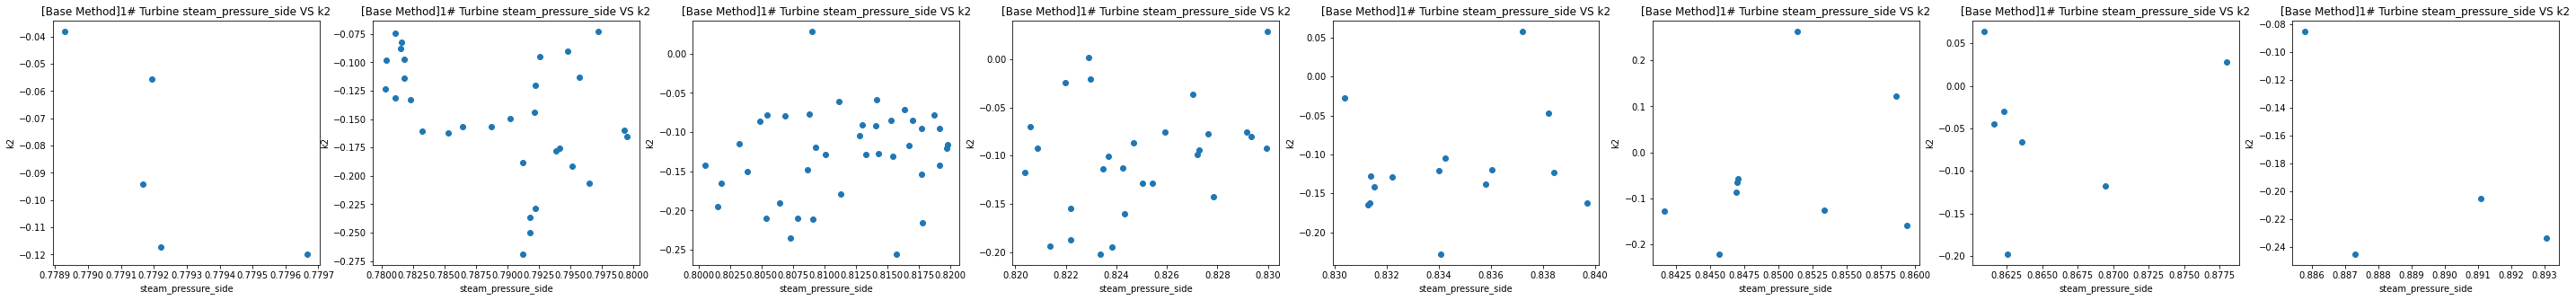

In [44]:
fig, axs = plt.subplots(figsize = (50, 5))
plt.subplot(1, 8, 1)
plt.scatter(temp_df_side_1["eturb_m1_steam_pressure_side"], temp_df_side_1["eturb_m1_base_k2"])
plt.title("[Base Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 2)
plt.scatter(temp_df_side_2["eturb_m1_steam_pressure_side"], temp_df_side_2["eturb_m1_base_k2"])
plt.title("[Base Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 3)
plt.scatter(temp_df_side_3["eturb_m1_steam_pressure_side"], temp_df_side_3["eturb_m1_base_k2"])
plt.title("[Base Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 4)
plt.scatter(temp_df_side_4["eturb_m1_steam_pressure_side"], temp_df_side_4["eturb_m1_base_k2"])
plt.title("[Base Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 5)
plt.scatter(temp_df_side_5["eturb_m1_steam_pressure_side"], temp_df_side_5["eturb_m1_base_k2"])
plt.title("[Base Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 6)
plt.scatter(temp_df_side_6["eturb_m1_steam_pressure_side"], temp_df_side_6["eturb_m1_base_k2"])
plt.title("[Base Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 7)
plt.scatter(temp_df_side_7["eturb_m1_steam_pressure_side"], temp_df_side_7["eturb_m1_base_k2"])
plt.title("[Base Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.subplot(1, 8, 8)
plt.scatter(temp_df_side_8["eturb_m1_steam_pressure_side"], temp_df_side_8["eturb_m1_base_k2"])
plt.title("[Base Method]1# Turbine steam_pressure_side VS k2")
plt.xlabel("steam_pressure_side")
plt.ylabel("k2")
plt.show()